Using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
| Train   0  | Loss:  3.831  | Acc: 11.342% |
|  Test   0  | Loss:  3.367  | Acc: 17.620% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train   1  | Loss:  3.152  | Acc: 22.044% |
|  Test   1  | Loss:  2.916  | Acc: 26.400% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train   2  | Loss:  2.757  | Acc: 29.372% |
|  Test   2  | Loss:  2.644  | Acc: 31.610% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train   3  | Loss:  2.488  | Acc: 34.832% |
|  Test   3  | Loss:  2.381  | Acc: 37.170% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train   4  | Loss:  2.302  | Acc: 38.718% |
|  Test   4  | Loss:  2.336  | Acc: 39.290% |
Epoch time: 0:00:19
-------------------

| Train  42  | Loss:  1.263  | Acc: 63.344% |
|  Test  42  | Loss:  1.852  | Acc: 52.220% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  43  | Loss:  1.258  | Acc: 63.634% |
|  Test  43  | Loss:  1.677  | Acc: 55.240% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  44  | Loss:  1.246  | Acc: 63.826% |
|  Test  44  | Loss:  1.914  | Acc: 52.150% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  45  | Loss:  1.251  | Acc: 63.882% |
|  Test  45  | Loss:  1.663  | Acc: 55.370% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  46  | Loss:  1.248  | Acc: 63.988% |
|  Test  46  | Loss:  1.782  | Acc: 52.890% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  47  | Loss:  1.225  | Acc:

| Train  85  | Loss:  0.940  | Acc: 71.982% |
|  Test  85  | Loss:  1.450  | Acc: 61.490% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  86  | Loss:  0.923  | Acc: 72.322% |
|  Test  86  | Loss:  1.615  | Acc: 58.260% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  87  | Loss:  0.920  | Acc: 72.352% |
|  Test  87  | Loss:  1.572  | Acc: 59.540% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  88  | Loss:  0.906  | Acc: 72.988% |
|  Test  88  | Loss:  1.670  | Acc: 57.210% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  89  | Loss:  0.900  | Acc: 73.214% |
|  Test  89  | Loss:  1.733  | Acc: 55.860% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  90  | Loss:  0.893  | Acc:

| Train  128 | Loss:  0.457  | Acc: 85.634% |
|  Test  128 | Loss:  1.534  | Acc: 63.100% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  129 | Loss:  0.439  | Acc: 86.140% |
|  Test  129 | Loss:  1.645  | Acc: 61.350% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  130 | Loss:  0.426  | Acc: 86.668% |
|  Test  130 | Loss:  1.580  | Acc: 62.910% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  131 | Loss:  0.413  | Acc: 87.052% |
|  Test  131 | Loss:  1.527  | Acc: 64.140% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  132 | Loss:  0.396  | Acc: 87.542% |
|  Test  132 | Loss:  1.660  | Acc: 61.790% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  133 | Loss:  0.380  | Acc:

| Train  171 | Loss:  0.018  | Acc: 99.736% |
|  Test  171 | Loss:  1.263  | Acc: 71.120% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  172 | Loss:  0.017  | Acc: 99.728% |
|  Test  172 | Loss:  1.270  | Acc: 70.840% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  173 | Loss:  0.017  | Acc: 99.770% |
|  Test  173 | Loss:  1.249  | Acc: 71.040% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  174 | Loss:  0.014  | Acc: 99.808% |
|  Test  174 | Loss:  1.255  | Acc: 71.280% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  175 | Loss:  0.014  | Acc: 99.802% |
|  Test  175 | Loss:  1.240  | Acc: 70.980% |
Epoch time: 0:00:19
--------------------------------------------------------------------------------
| Train  176 | Loss:  0.013  | Acc:

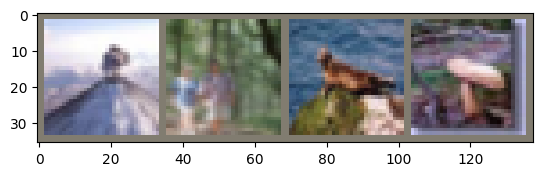

GroundTruth: 49 33 72 51
Predicted: 68 33 55 51


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=1)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False, num_workers=1)

model = resnet18(weights=None)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.fc = nn.Linear(model.fc.in_features, 100)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

def train(epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    print(f"| {'Train':^6} {epoch:^3} | Loss: {train_loss/(batch_idx+1):^7.3f} | Acc: {acc:^6.3f}% |")

def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    print(f"| {'Test':^6} {epoch:^3} | Loss: {test_loss/(batch_idx+1):^7.3f} | Acc: {acc:^6.3f}% |")
    return acc

import time
from datetime import timedelta

total_start_time = time.time()
epoch_times = []

best_acc = 0
for epoch in range(200):
    epoch_start = time.time()
    train(epoch)
    acc = test(epoch)
    scheduler.step()
    
    epoch_time = time.time() - epoch_start
    epoch_times.append(epoch_time)

    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), 'best_model.pth')
    print(f'Epoch time: {timedelta(seconds=int(epoch_time))}')
    print('-' * 80)
    
total_time = time.time() - total_start_time
print(f'Total training time: {timedelta(seconds=int(total_time))}')
print(f'Average epoch time: {timedelta(seconds=int(sum(epoch_times)/len(epoch_times)))}')

print(f'Best Test Accuracy: {best_acc:.2f}%')

def imshow(img):
    img = img * torch.tensor([0.2675, 0.2565, 0.2761]).view(3, 1, 1) + \
          torch.tensor([0.5071, 0.4867, 0.4408]).view(3, 1, 1)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth:', ' '.join(f'{labels[j]}' for j in range(4)))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join(f'{predicted[j]}' for j in range(4)))